# Machine Learning Engineer Nanodegree 
## Unsupervised Learning Project - Creating Customer Segments

Unsupervised learning is similar to pattern recognition in the sense that it is about **looking for patterns** through analyzing data. This method is often used to find structure in unlabeled data since the evaluation is indirect.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
import seaborn as sns

# Display and Graphical
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

In [2]:
# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


# I. Data Exploration
*In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.*

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [85]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


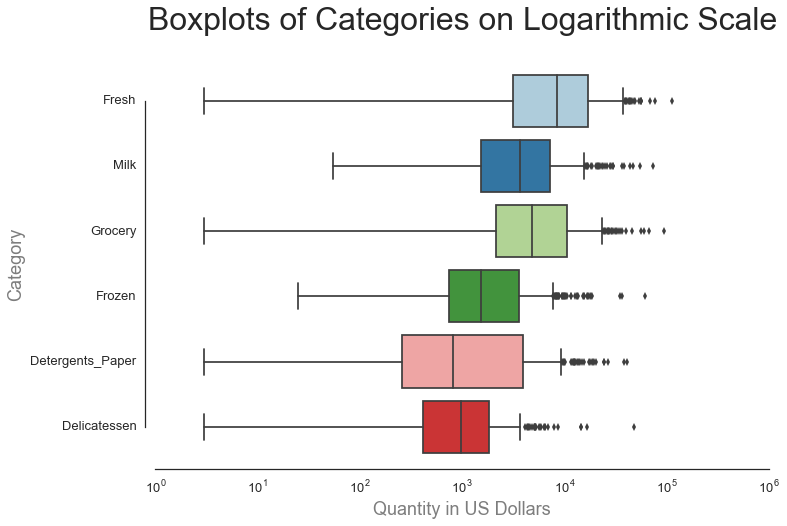

In [86]:
ax = sns.boxplot(data=data, orient="h", palette="Paired")
sns.set(style="white", context="talk")
ax.figure.set_size_inches(11, 7)
ax.axes.set_title('Boxplots of Categories on Logarithmic Scale\n', fontsize=32)
ax.set_xlabel('Quantity in US Dollars', fontsize=18, alpha=0.6)
ax.set_ylabel('Category', fontsize=18, alpha=0.6)
ax.set_xscale("log")
sns.despine(offset=10, trim=True)

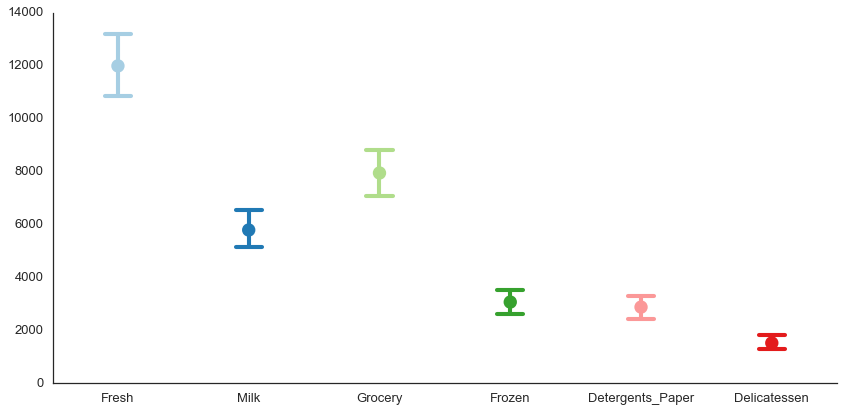

In [87]:
gf = sns.factorplot(data=data, capsize=.2, size = 6, aspect=2, palette="Paired")

### Notes on Data:

Looking at the distribution of data, the difference between the mean and median are quite distinct. This implies a skewed distribution likely from cause of outliers. We can also note that all medians fall below the stated means, suggesting the distribution is **skewed right**. 

### Implementation: Selecting Samples
*To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.*

Select three samples that samples that appear distinct and save to dataframe:

In [88]:
# Use pythons built in random function to find some random points!
# import random
# random.sample(range(0, 440), 3)

In [89]:
# My three indices from random sample
indices = [26, 326, 10]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9898,961,2861,3151,242,833
1,4414,1610,1431,3498,387,834
2,3366,5403,12974,4400,5977,1744


### Question 1
*Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.*  
- *What kind of establishment (customer) could each of the three samples you've chosen represent?*  

In [90]:
# Creat dataframe fro each customer
cust_A = [9898, 961, 2861, 3151, 242, 833]
cust_B = [4414, 1610, 1431, 3498, 387, 834]
cust_C = [3366, 5403, 12974, 4400, 5977, 1744]
data_medians = [8504, 3627, 4755.5, 1526, 816.5, 965.50]

def customer_info(cust, name):
    tc = float(sum(cust))
    print "Total spending of {}: ${:.2f}\n".format(name, tc)
    print "Spending Category\t\t\tAmount Spent\t\t\tMedian\t\t\tPercentage"
    print "\tFresh\t\t\t\t${}\t\t\t\t${}\t\t\t{:.2f}%".format(cust[0], data_medians[0], (cust[0] / tc)*100)
    print "\tMilk\t\t\t\t${}\t\t\t\t${}\t\t\t{:.2f}%".format(cust[1], data_medians[1], (cust[1] / tc)*100)
    print "\tGrocery\t\t\t\t${}\t\t\t\t${}\t\t\t{:.2f}%".format(cust[2], data_medians[2], (cust[2] / tc)*100)
    print "\tFrozen\t\t\t\t${}\t\t\t\t${}\t\t\t{:.2f}%".format(cust[3], data_medians[3], (cust[3] / tc)*100)
    print "\tDetergents_Paper\t\t${}\t\t\t\t${}\t\t\t{:.2f}%".format(cust[4], data_medians[4], (cust[4] / tc)*100)
    print "\tDelicatessen\t\t\t${}\t\t\t\t${}\t\t\t{:.2f}%".format(cust[5], data_medians[5], (cust[5] / tc)*100)
    print "\t---------------------------------------------------------------------------------------------------"

customer_info(cust_A, "customer A")
print
customer_info(cust_B, "customer B")
print
customer_info(cust_C, "customer C")

Total spending of customer A: $17946.00

Spending Category			Amount Spent			Median			Percentage
	Fresh				$9898				$8504			55.15%
	Milk				$961				$3627			5.35%
	Grocery				$2861				$4755.5			15.94%
	Frozen				$3151				$1526			17.56%
	Detergents_Paper		$242				$816.5			1.35%
	Delicatessen			$833				$965.5			4.64%
	---------------------------------------------------------------------------------------------------

Total spending of customer B: $12174.00

Spending Category			Amount Spent			Median			Percentage
	Fresh				$4414				$8504			36.26%
	Milk				$1610				$3627			13.22%
	Grocery				$1431				$4755.5			11.75%
	Frozen				$3498				$1526			28.73%
	Detergents_Paper		$387				$816.5			3.18%
	Delicatessen			$834				$965.5			6.85%
	---------------------------------------------------------------------------------------------------

Total spending of customer C: $33864.00

Spending Category			Amount Spent			Median			Percentage
	Fresh				$3366				$8504			9.94%
	Milk				$5403				$3627			15.95%
	G

### Customer A
>The first randomly selected customer allocates their spending on the items from highest to lowest:
1. Fresh produce - 55.15%
2. Frozen items - 17.56%
3. Groceries - 15.94%
4. Milk - 5.35%
5. Delicatessen - 4.64%
6. Detergents and Paper - 1.35%


>- Customer A spends a a high percentage of their budget on fresh items and the lowest on detergents and paper
    - They allocate **over 55 percent of their spending on fresh produce** and **less than 1.5 percent on detergents and paper**
- They spend **significantly less than the sample mean** on `milk` and `detergents_paper` 

>My prediction would be that this customer is a **restaurant**:
- The greatest allocation of purchases is to food (fresh, milk, frozen). This may indicate that these are purchases of raw materials to prepare dining meals. 
- The low detergents and paper category suggests they have little need for cleaning and paper products that perhaps a store may sell. 

### Customer B
>The first randomly selected customer allocates their spending on the items from highest to lowest:
1. Fresh produce - 37.17%
2. Frozen items - 29.46%
3. Milk - 13.56%
4. Groceries - 12.05%
5. Delicatessen - 7.02%
6. Detergents and Paper - 0.73%

>- Customer B spends their budget more evenly across the board in contrast to the other two sampled candidates
- Their highest spending category is `produce` and their lowest is `detergents_paper`
- They spend **significantly less than the sample mean** on `detergents_paper`

>My prediction would be that this customer is a **cafe**:
- While customer B purchase more uniformaly among the categories, they still spend more on food (fresh, frozen, milk). 
- Customer B has an identical purchase pattern as customer A which supports the restaruant/cafe model.

### Customer C
>The second randomly selected customer allocates their spending on the items from highest to lowest:
*We can also note that Customer C had the largest overall budget from the three taken samples*

>1. Grocery - 38.31%
2. Detergents and Paper - 17.65%
3. Milk - 15.94%
4. Frozen items - 12.99%
5. Fresh - 9.94%
6. Delicatessen - 5.15%


>Customer C spends a a high percentage of their budget on grocery and detergents_paper, though they too (similar to customer B) have a more univarate spending pattern among the categories.
- They allocate **over 38 percent of their spending on grocery** and **less than 6 percent on delicatessen**
- They spend **more than the sample mean** on `grocery` and `detergents_paper`
- They spend **significantly less than the sample mean** on `fresh`


>My prediction is that this customer is a **super market**:
- The greatest allocation of purchases is to grocery and detergent_paper. These are materials that have a good shelf life and can stay in stock. The univerate data suggest they carry a diverse range of products from cleaning materials to fresh produce. 

## Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [91]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
try:
    new_data = data.drop('Grocery', axis = 1)
    # Extract target column 'passed'
    target = data['Grocery']
    print "Wholesale customers 'new_data' has {} samples with {} features each.".format(*new_data.shape)
except:
    print "Dataset could not be loaded."

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=0)

print("X has {} training points and {} test points").format(X_train.shape, X_test.shape)
print("Y has {} training poins and {} test points").format(y_train.shape, y_test.shape)
# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

def regres_score(r, aX_test, ay_test):
    print("Residual sum of squares: %.2f"
          % np.mean((r.predict(aX_test) - ay_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r.score(aX_test, ay_test))
    
regres_score(regressor, X_test, y_test)

Wholesale customers 'new_data' has 440 samples with 5 features each.
X has (330, 5) training points and (110, 5) test points
Y has (330,) training poins and (110,) test points
Residual sum of squares: 22156663.79
Variance score: 0.60


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  

**Answer:**
>I used `Grocery` to predict the customer's spending habits. The reported coefficient of determination, or R^2 score, was 0.60. This shows a good fit and prediction mechanism.

>**60% of the variation observed in customer's spending habits can be explained by the related spending costs in Grocery related items.**

## Residual Plot

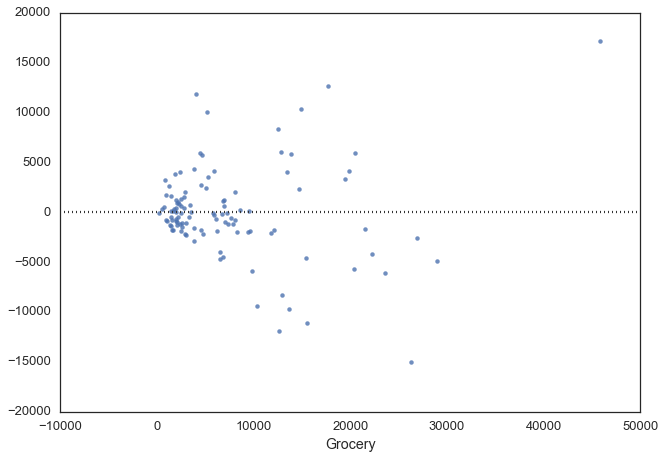

In [92]:
a = sns.residplot(y_test, regressor.predict(X_test), data=new_data)

## Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

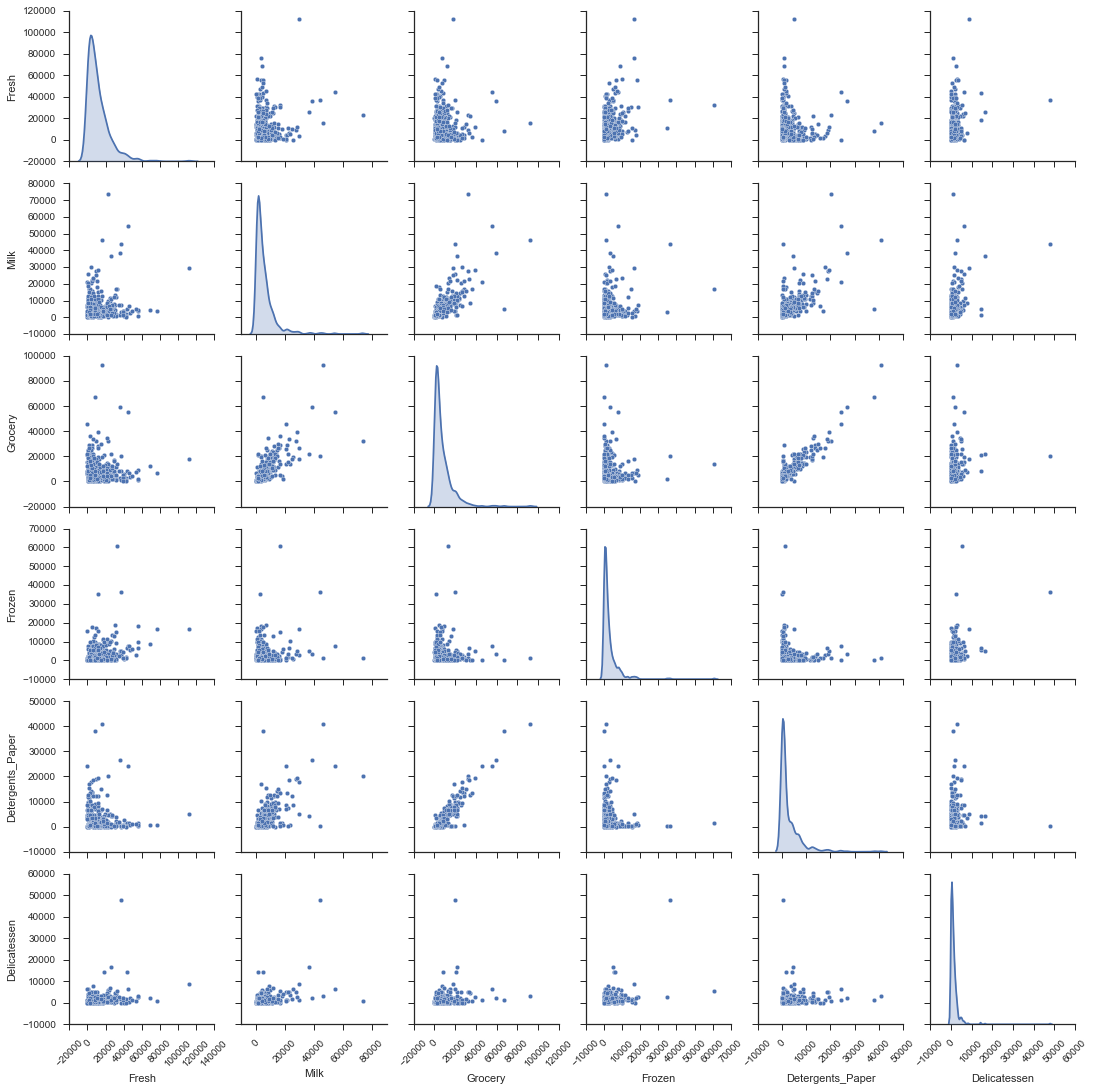

In [93]:
# Produce a scatter matrix for each pair of features in the data
# pd.scatter_matrix(data, alpha = 0.3, figsize = (16,12), diagonal = 'kde')
# plt.tight_layout()
# plt.show()

sns.set(style="ticks", color_codes=True, context="notebook")
p = sns.pairplot(data, diag_kind="kde", diag_kws=dict(shade=True))
for ax in p.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?* 

>From my visual observations there are three feature combinations that appear to hold stong correlations. In order of what I visually appears strongest to weakest: 
1. Grocery x detergents_paper
2. Grocery x milk
3. Milk x detergents_paper

>The other correlation that visually stands out is frozen x detergents_paper. The scatter plot appears visually similar to some derivation of a non-linear function or logarithmic function where as one point decreases the other increases. This could represent a low or negative correlation. 

>The data is not uniformally distributed, it is **skewed right**. Most of the points are concentrated in the lower left with the tail falling to the right of the distribution. 

>The target feature I choose to extract, `Grocery`, shows strong correlation with other categories. With the two strong correlations I found that included Grocery, I believe this a good predictor. 

# II. Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

## Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

Wholesale customers 'new_data' has 440 samples with 5 features each.

Wholesale customers 'log_data' has 440 samples with 6 features each.
Wholesale customers 'log_data5' has 440 samples with 5 features each.
Wholesale customers'log_target' has 440 samples.


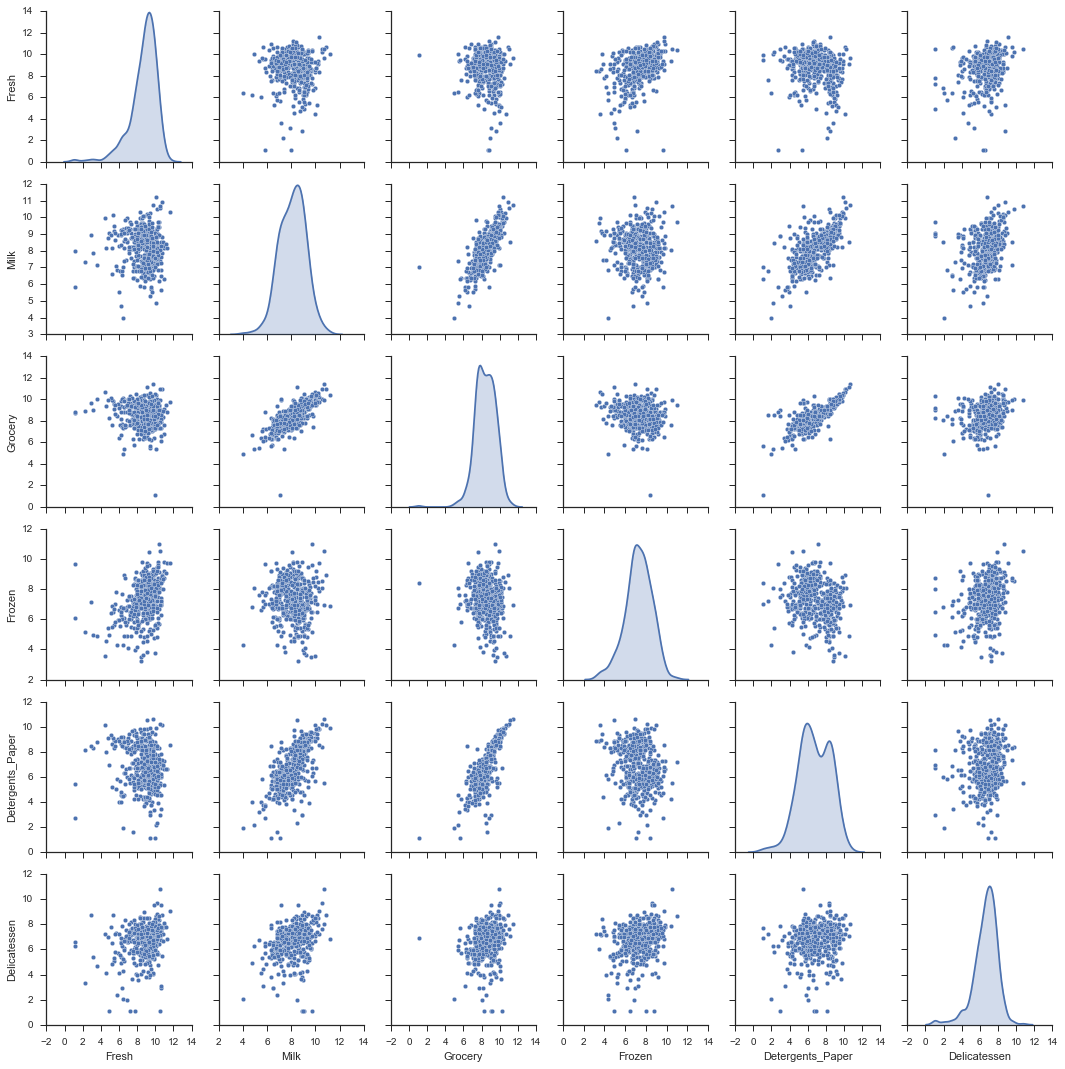

In [94]:
try:
    # Scale the data using the natural logarithm
    log_data = np.log(data)
    log_data5 = np.log(new_data) 
    # Scale the sample data using the natural logarithm
    log_samples = np.log(samples)
    
    # Scale the target data using natural logarithm
    log_target = np.log(target)
    print "Wholesale customers 'new_data' has {} samples with {} features each.\n".format(*new_data.shape)
    print "Wholesale customers 'log_data' has {} samples with {} features each.".format(*log_data.shape)
    print "Wholesale customers 'log_data5' has {} samples with {} features each.".format(*log_data5.shape)
    print "Wholesale customers'log_target' has {} samples.".format(*log_target.shape)
except:
    print "Dataset could not be loaded."

# Produce a scatter matrix for each pair of newly-transformed features
# pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
fs = sns.pairplot(log_data, diag_kind="kde", diag_kws=dict(shade=True))

## Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [95]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.200088,6.867974,7.958926,8.055475,5.488938,6.725034
1,8.392537,7.383989,7.266129,8.159947,5.958425,6.726233
2,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937


## Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [96]:
outliers_index = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
#     print "Data points considered outliers for the feature '{}':".format(feature)
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
#     display (feature_outliers)
    
    outliers_index += feature_outliers.index.tolist()

# Find duplicates for indices that reside in more than one feature
duplicates = set([i for i in outliers_index if outliers_index.count(i) > 1])
print("Duplicate indices: {}").format(duplicates)

Duplicate indices: set([128, 65, 66, 75, 154])


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

#### There are four outliers that coincide with more than one feature:
Data point numbers: **65, 66, 75, 128 and 154**

>- Data point number 65:
    - Outlier for `Fresh` and `Frozen`
- Data point number 66:
    - Outlier for `Fresh` and `Delicatessen`
- Data point number 75:
    - Outlier for `Grocery` and `Detergents_Paper`
- Data point number 128:
    - Outlier for `Fresh` and `Delicatessen`
- Data point number 154:
    - Outlier for `Detergents_Paper` `Grocery`, and `Delicatessen` 

>I believe these points **should be removed** from the dataset. Outliers are often the result of human error (data entry, sensor malfunction) or a freak event. Though outliers may be accurate points in a test sample they can strongly impact the results of a test. One 

# III. Removing Outliers

In [120]:
cleaned_data=[]
this_err_data=[]
err = (log_target - regressor.predict(log_data5))**2
Q_90 = np.percentile(err, 90)

cleaned_data = zip(log_data5.index, err, err >= Q_90)
cleaned_data = sorted(cleaned_data, key=lambda x:x[1], reverse=True)
# display (cleaned_data)
# a2 = zip(*cleaned_data)
# print a2[0]

In [121]:
# Select the indices for data points you wish to remove
try:
    outliers = [75, 154, 356, 275, 122, 161, 131, 289, 247, 367, 148, 228, 398, 
                238, 237, 97, 277, 369, 130, 436, 98, 168, 186, 361, 39, 399, 
                206, 270, 261, 143, 269, 185, 375, 405, 388, 133, 400, 286, 
                395, 69, 288, 390, 336, 191]

    # Remove the outliers, if any were specified
    good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
    good_data5 = good_data.drop('Grocery', axis=1)
    good_target = target.drop(log_data.index[outliers]).reset_index(drop = True)
    print("{} outliers were successfully removed:\n{}\n").format(len(outliers), outliers)
except:
    print("Error in removing outliers..")

print("Wholesale customers 'good_data' has {} samples with {} features each.").format(*good_data.shape)
print("Wholesale customers 'good_data5' has {} samples with {} features each.").format(*good_data5.shape)

44 outliers were successfully removed:
[75, 154, 356, 275, 122, 161, 131, 289, 247, 367, 148, 228, 398, 238, 237, 97, 277, 369, 130, 436, 98, 168, 186, 361, 39, 399, 206, 270, 261, 143, 269, 185, 375, 405, 388, 133, 400, 286, 395, 69, 288, 390, 336, 191]

Wholesale customers 'good_data' has 396 samples with 6 features each.
Wholesale customers 'good_data5' has 396 samples with 5 features each.


In [135]:
good_X_train, good_X_test, good_y_train, good_y_test = train_test_split(good_data,
                                                                       good_target,
                                                                       test_size = 0.25, 
                                                                       random_state=0)
good_regressor = DecisionTreeRegressor(random_state=42)
good_regressor.fit(good_X_train, good_y_train)


regres_score(good_regressor, good_X_test, good_y_test)

Residual sum of squares: 817418.30
Variance score: 0.99


Removing outliers increased the variance score to 0.99. We can now say that **99% of the variation observed in customer's spending habits can be explained by our features.**

### Note how the distribution below is becoming more centralized as the outliers were removed.

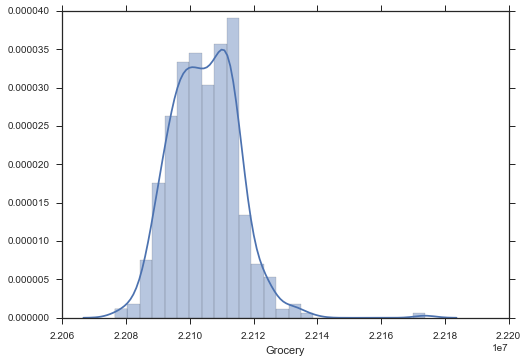

In [136]:
sns.distplot(err)

### Linear Model to Predict Grocery
Though were are exploring classification to identify clusters patterns, we can still identify the linear model and individual coeffeciants. 

The model below can show that `Grocery` is **positively correlated** with `Delicatessen`, `Milk`, and `Detergents_Paper` while **negatively correlated** with `Frozen` and `Fresh`. Meaning that as the positively correlated variables increases our expected `Grocery` output will increase. However, as `Frozen` and `Fresh` increase we can expect `Grocery` to decrease.

In [137]:
from statsmodels.formula.api import ols
model = ols(formula = 'Grocery ~ Fresh + Milk + Frozen + Detergents_Paper + Delicatessen', data=good_data).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Grocery   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     190.5
Date:                Wed, 17 Aug 2016   Prob (F-statistic):          2.57e-102
Time:                        10:17:33   Log-Likelihood:                -271.00
No. Observations:                 396   AIC:                             554.0
Df Residuals:                     390   BIC:                             577.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            3.9509      0.277     14.242      0.000         3.406     4.496
Fresh               -0.0371      0.018     -2.091      0.037        -0.072    -0.002
Milk                 0.3620      0.034     10.588      0.000         0.295     0.429
Frozen              -0.0099      0.021     -0.472      0.637        -0.051     0.031
Detergents_Paper     0.2909      0.020     14.190      0.000         0.251     0.331
Delicatessen         0.0098      0.021      0.472      0.637        -0.031     0.051
==============================================================================
Omnibus:                       30.762   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.270
Skew:                           0.441   Prob(JB):                     3.01e-14
Kurtosis:                       4.731   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Notes from output
- Note the **skewness**: skew = 0.441. After removing outliers the skew decreases about 60%. We can see the right till still exhists but is decreased.(This can be found by running the OLS model on the original dataset).
- 'Detergents_Paper' and 'Milk' have significant **p-values** which may indicate there is no association between them and our dependent variable, 'Grocery'
- The **R-squared** shows we have a good fit

# IV. Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

## Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[]

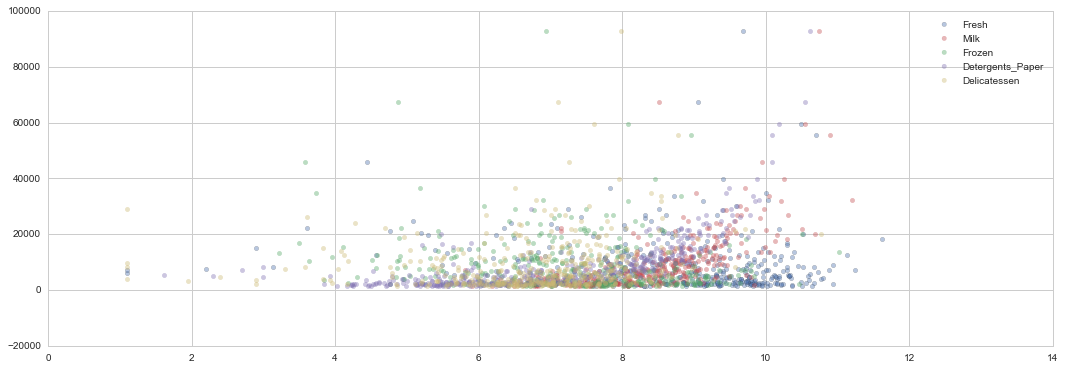

In [138]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(18, 6))
    plt.scatter(good_data['Fresh'], good_target, label= 'Fresh', alpha = 0.4)
    plt.scatter(good_data['Milk'], good_target, label='Milk', color="r", alpha=0.4)
    plt.scatter(good_data['Frozen'], good_target, label='Frozen', color="g", alpha=0.4)
    plt.scatter(good_data['Detergents_Paper'], good_target, label='Detergents_Paper', color="m", alpha=0.4)
    plt.scatter(good_data['Delicatessen'], good_target, label='Delicatessen', color="y", alpha=0.4)
    plt.legend(loc="best")

plt.plot()

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4006,-0.3754,0.3154,0.3620,-0.3286,0.7214,-0.0100
Dimension 2,0.2948,0.6178,0.2570,0.1748,0.3952,0.3086,0.5199
Dimension 3,0.1326,0.6718,-0.0264,0.0177,-0.3657,0.1771,-0.6185
Dimension 4,0.1085,-0.1576,0.0491,0.0863,0.7740,0.1978,-0.5719
Dimension 5,0.0452,0.0004,0.7952,0.2815,-0.0542,-0.5154,-0.1410
Dimension 6,0.0184,-0.0340,0.4462,-0.8668,-0.0055,0.2195,-0.0147


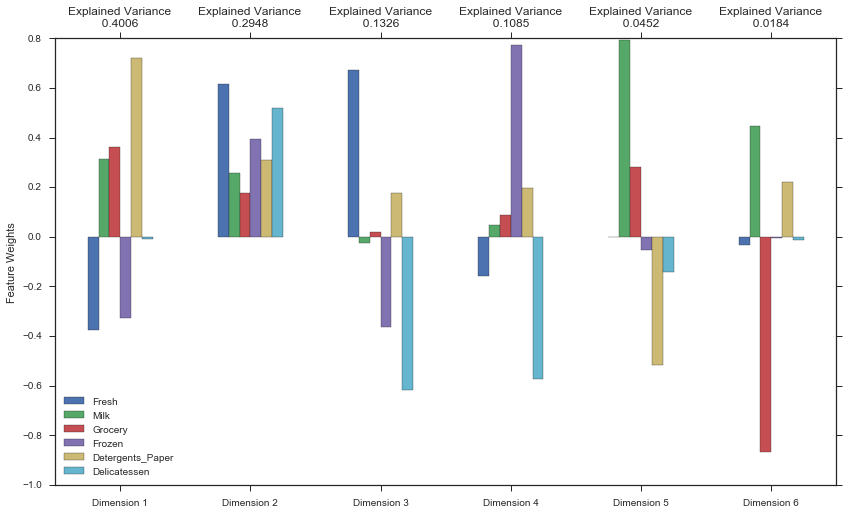

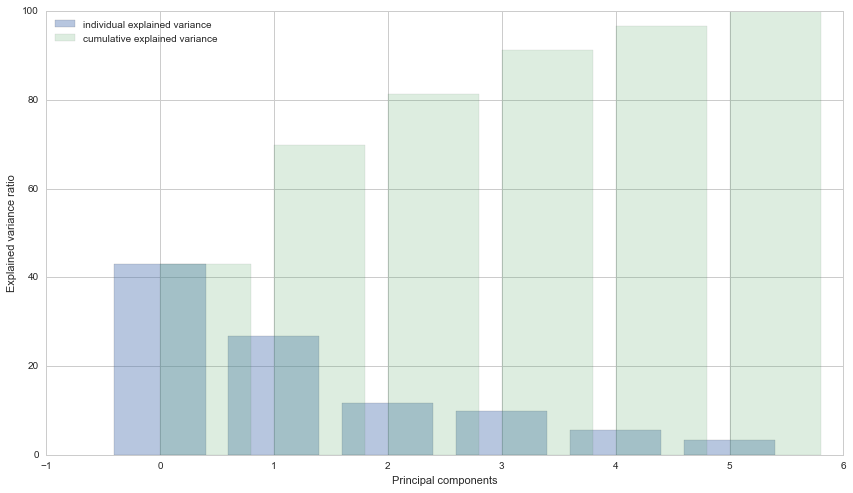

In [140]:
from sklearn.decomposition import PCA

# Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)
display(pca_results)

# Generate bar chart of cumulative explained variance vs dimensional explained variance
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(good_X_train)
cov_mat = np.cov(X_std.T)
cor_mat2 = np.corrcoef(good_X_train.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat2)
u,s,v = np.linalg.svd(X_std.T)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse = True)
# print('Eigenvalues in descending order:')
# for i in eig_pairs:
#     display(i[0])

    
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 7))

    plt.bar(range(6), var_exp, alpha=0.4, align='center', label='individual explained variance')
    plt.bar(range(6), cum_var_exp, alpha=0.2, label='cumulative explained variance', color="g")
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
#     fig = plt.figure(2, figsize=(8,6))
#     ax = Axes3D(fig, elev=-150, azim=110)
#     ax.scatter()

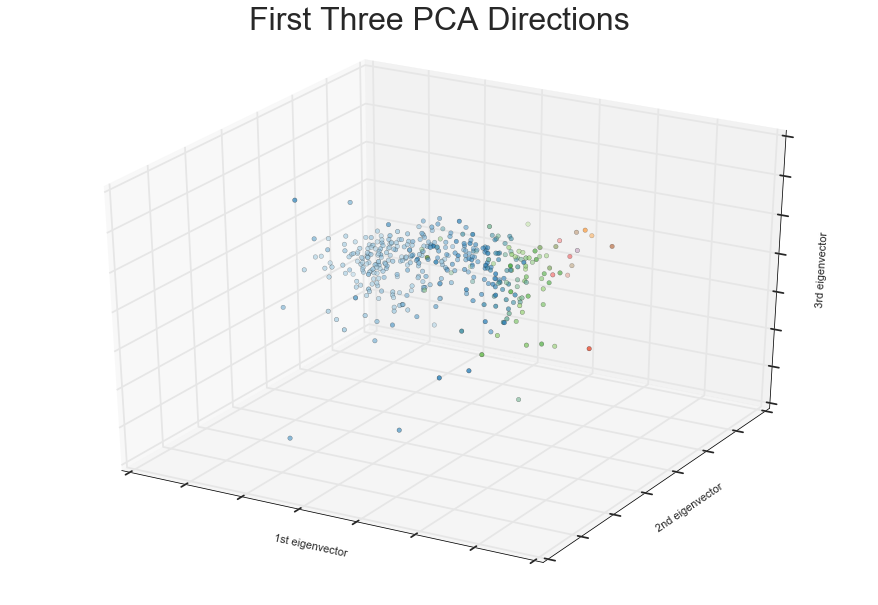

In [141]:
from mpl_toolkits.mplot3d import Axes3D

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
# http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#example-datasets-plot-iris-dataset-py

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
X_reduced3 = PCA(n_components=3).fit_transform(good_data)
ax.scatter(X_reduced3[:, 0], X_reduced3[:, 1], X_reduced3[:, 2], c=good_target,
           cmap=plt.cm.Paired)

ax.set_title('First Three PCA Directions\n', fontsize=32)
ax.set_xlabel("1st eigenvector")
# ax.set_xlim3d(-6,6)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
# ax.set_ylim3d(-5,4)
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
# ax.set_zlim3d(-9,8)
plt.draw()
plt.show()

In [142]:
X_std = StandardScaler().fit_transform(good_X_train)
cov_mat = np.cov(X_std.T)
cor_mat2 = np.corrcoef(good_X_train.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat2)
u,s,v = np.linalg.svd(X_std.T)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse = True)
# print('Eigenvalues in descending order:')
# for i in eig_pairs:
#     display(i[0])

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.* A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.*

### PCA 1
>The **first PCA** scores an explained sample variance of 0.4006. In terms of customer spending, the first PCA has a high explanatory value for **`Detergents_Paper`**. The explained variance of Detergents_Paper on the the first dimension is approximately 72% and approximately 65% of the weighted positive variation; `Fresh` is at its absolute maximum variance. The lowest variance score is represented by the feature `Fresh`. 

>In this first eigenvector, the target principal is most **positively** influenced by a customers preference in buying Detergents_Paper and most **negatively** influenced by a customers preference in Fresh. As a customer buys more Detergents_Paper our target variable will be affected by a positive increase. However, if a customer purchases Fresh, our target variable will be negatively associated and could end in a reduction to our target variable. 

>Because `Detergents_Paper` is a leading indicater in PCA 1, my speculation would be that this eigenframe could be a predictor for a small market. Examples could be a hotel covenience market, a gas-station market, or a university or school market; a place that sells necesseties, groceries, and supplies more so than food. 

### PCA 2
>The **second PCA** scores an explained sample variance of 0.2948. The second PCA has a high explanatory value for `Delicatessen`. It also has a high explanatory value for `Fresh` though the third PCA, as we will see, has a higher variance score. What we can also note about the second PCA is that all features indicate positive variances under dimension 2.

>In this second eigenvector, the target principal is most **positively** influenced by a customers preference in buying Delicatessen and most **negatively** influenced by a customers preference in Grocery. Because, this dimension features all positive variances, there is not a component that negatively affects our target variable. Though Delicatessen more strongly influences our target then Grocery! 

>Because `Fresh` is a leading indicater in PCA 1, my speculation would be that this eigenframe could be a good predictor for a restaurant. Because all the predictor variable returned postive variances, this could back up my theory. Restaurants generally need all of these items. The strongest predictors here are Fresh and Frozen. Because milk and grocery didn't return as high variance, I ruled out grocery stores.

>*__69.54% of the variance in samples explained by these first to dimensions, combined.__*  


### PCA 3 
>The **third PCA** scores an explianed sample variance of 0.1326. A strong variance score is present in `Fresh`, just slightly above the second PCA score but only in PCA 3 does it achieve its absolute maximum. The weakest variable is `Delicatessen`, with a variance score of -0.6185.

>In the third eigenvector, the target principal is most **positively** influenced by a customers preference in buying Fresh and most **negatively** influenced by a customers preference in Delicatessen. 

>Because `Fresh` and `Detergents_Paper` are strong predictors for the third eigenframe, my speculation is that this is a good predictor for a grocery outlet. Fresh produce is certainly necessary at a grocery outlet but detergent_paper is equally very important for a supermarket-type convenience store. 

### PCA 4
>The **fourth PCA** scores an explained sample variance of 0.1085. A strong variance score is present in `Frozen` and serves as the variables absolute maximum. while a small variance is present in `Delicatessen`. 

>In the fourth eigenvector, the target principal is most **positively** influenced by a customers preference in buying Frozen and most **negatively** influenced by a customers preference in Delicatessen. 


>*__The first four principal components explain 93.65% of the of the variance in sample data.__* 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [108]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.2295,-0.3712,-0.1775,0.1209,-0.5864,-0.3791
1,-1.7101,-0.6718,-0.7018,0.3868,-0.6192,0.5815
2,1.4635,1.1763,-0.9323,0.9765,-0.5633,-0.1913


## Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [147]:
# Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [148]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']).head())

,Dimension 1,Dimension 2
0,-2.2295,-0.3712
1,-1.7101,-0.6718
2,1.4635,1.1763


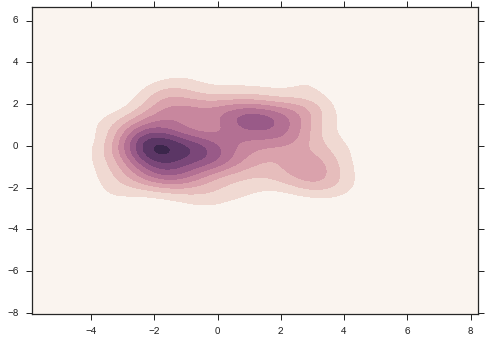

In [149]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(reduced_data, cmap=cmap, shade=True)

# V. Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

## K-Means Clustering Algorithm

The [K-Means algorithm](http://scikit-learn.org/stable/modules/clustering.html#k-means) is a frequently used model in unsupervised learning to solve clustering problems. The algorithm seperates 'n' samples into one of 'k' clusters as defined by centroids (or cluster centers). The algorithm continues to iterate a number of times to minimize the the sum of point-to-centroid distances. 

>**Complexity:** 
- Best Case: `O(k n T)`
- Worst Case: `O(n^(k+2/p)`

>**Advantages**
- One of the faster and simple clustering algorithms - efficient
- Highly scalable using `n_samples` and `n_clusters` in MiniBatch code
- Simple algorithm with flat geometry

>**Disadvantages**
- Algorithm and results are very dependent on where initial centroids are placed - this can effect results over multiple runs
- Must specify the number of clusters, 'k', in advanced
- Sensitive to outliers and noisy data
- Can converge to local optimum

## Gaussian Mixture Model Clustering Algorithm

[Gaussian mixture models](http://scikit-learn.org/stable/modules/mixture.html#mixture) (GMM) is a frequently used probabilistic model in cluster analysis. Similar to K-means, GMM utilizes clusters with centers but also weights the probabilistic tendency that a point belongs to a specific cluster. 

>**Advantages**
- Scales on z-axis and is able to handle geometric data
- Less sensitive to outliers and noisy data
- Computes component membership that a point lies within a certain cluster

>**Disadvantages**
- More parameters
- Overfitting

### Which to use?
Because we have a fairly simple dataset and don't need to run complex operations we can choose KMeans. 

## Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

### KMeans
Below we can select the optimal number of clusters using silhouette analysis on a KMeans cluster. Documentation for the code be found [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py) on the scikit learn wiki.

For n_clusters = 2 the average silhouette_score is : 0.416205561377
Training time = 0.05 seconds


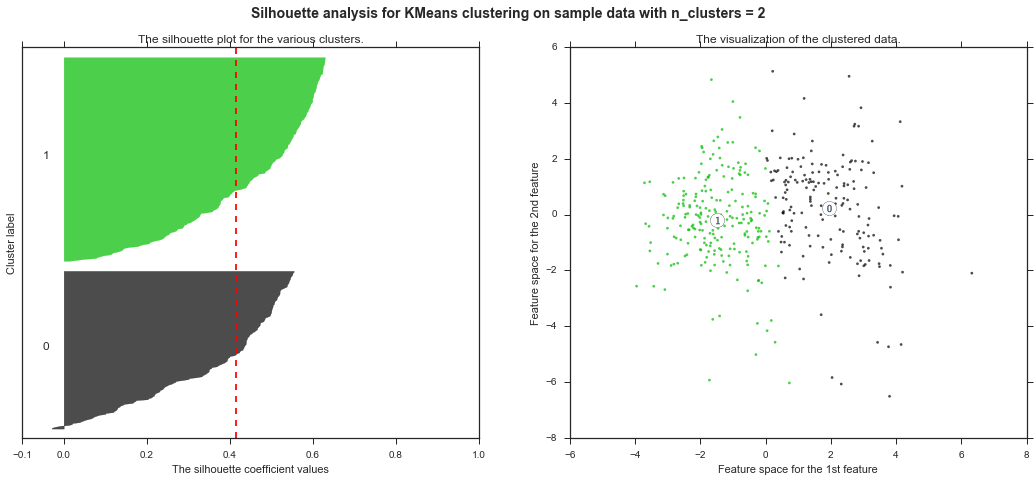

For n_clusters = 4 the average silhouette_score is : 0.349012418558
Training time = 0.08 seconds


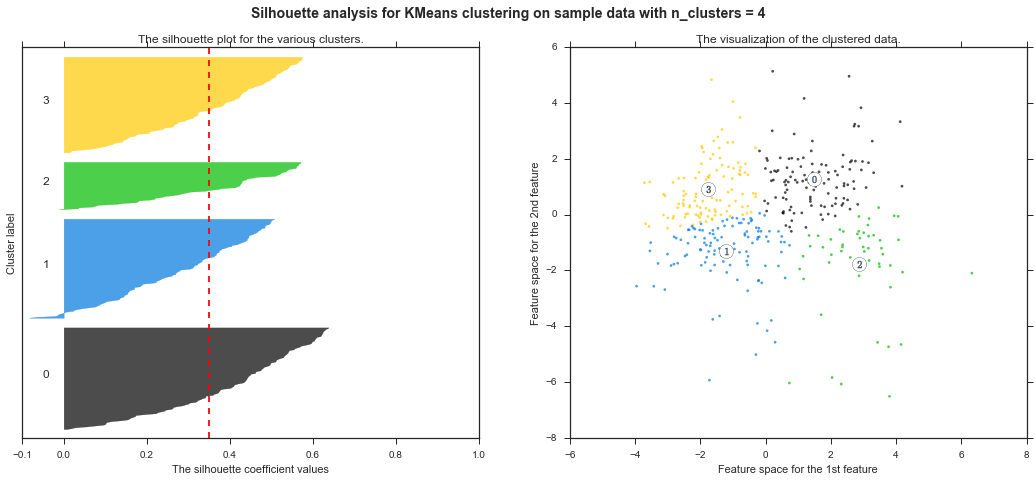

For n_clusters = 6 the average silhouette_score is : 0.377965271003
Training time = 0.07 seconds


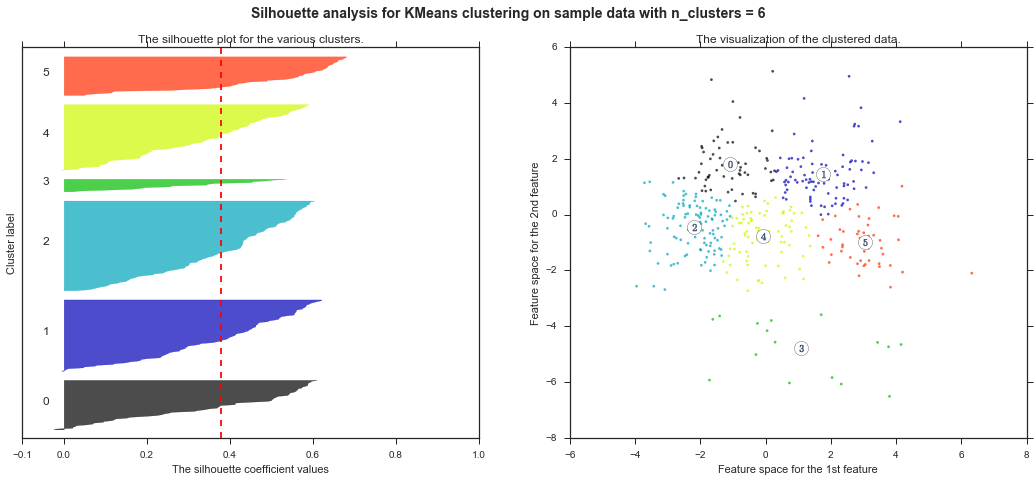

For n_clusters = 8 the average silhouette_score is : 0.363602193881
Training time = 0.06 seconds


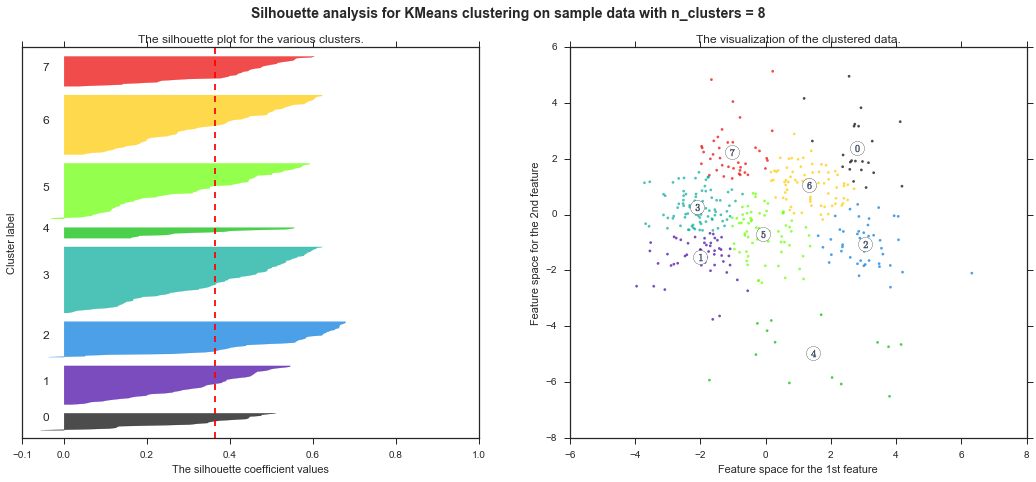

In [150]:
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm


range_n_clusters = [2, 4, 6, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(reduced_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    t0= time.time()
    cluster_labels = clusterer.fit_predict(reduced_data)
    t1=time.time()-t0

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(reduced_data, cluster_labels)
    print("For n_clusters = {} the average silhouette_score is : {}").format(n_clusters, silhouette_avg)
    print ("Training time = {:.2f} seconds").format(t1)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)
    
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

> **Answer:**
- Number of clusters = 2
    - Silhouette score: 0.416
    - Training time: 0.05 seconds
- Number of clusters = 4
    - Silhouette score: 0.349
    - Training time: 0.05 seconds
- Number of clusters = 6
    - Silhouette score: 0.378
    - Training time: 0.06 seconds
- Number of clusters = 8
    - Silhouette score: 0.364
    - Training time: 0.05 seconds

>From my runs, the **optimal number of clusters appears to be 2**. The silhouette score for a KMeans with 2 clusters on the sample data is 0.416 and the training time is about 0.05 seconds. It is interesting to note that a cluster of 6 outperforms 4 but not 8.

## Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [179]:
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, n_init=20).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)

print("K-Means Score: {}").format(score)

K-Means Score: 0.416205561377


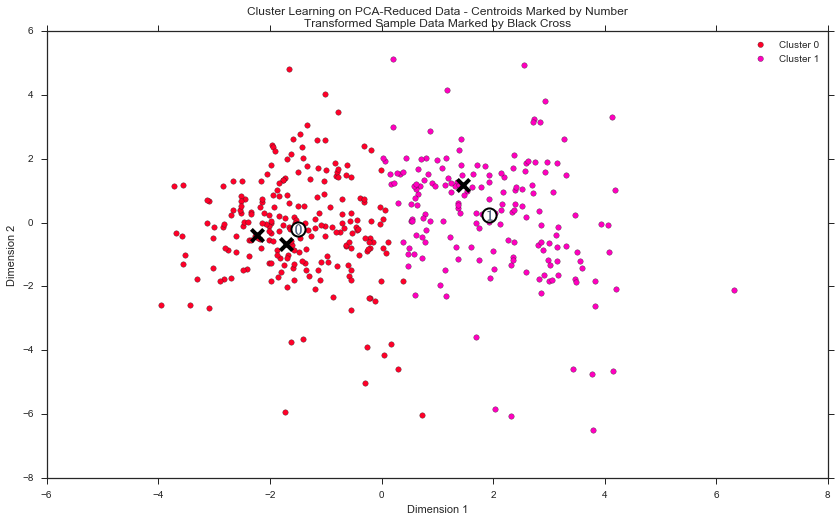

In [180]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

## Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [181]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Display how much the true centers deviate from original means
display(pd.DataFrame(((true_centers - data.mean())/data.std()).round(decimals=2)))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9514.0,2364.0,3239.0,2193.0,350.0,796.0
Segment 1,3456.0,7833.0,12138.0,847.0,4783.0,971.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-0.20,-0.47,-0.50,-0.18,-0.53,-0.26
Segment 1,-0.68,0.28,0.44,-0.46,0.40,-0.20


### Question 8
*Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. What set of establishments could each of the customer segments represent?*  

>**Answer:**
A customer who is assigned 'segment 0' represents small restaurants, cafe's and markets while a customer assigned 'segment 1' represents grocery stores and large produce markets. This can be deduced by analyzing the spending in each category as it relates to original analysis. The postulation that customers who spend more in cateogries such as, 'detergents_paper' and 'grocery', would lead us to believe that segment 1 better represents a retail grocery store where these items are needed in greater quantities.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [182]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
The predicted answers above are consistent with the established conslusions above. Sample points 0 and 1 are more likely restaurants or cafes where as sample point 2 is more likely a grocery store. 

# VI.Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the clustering data you've found to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

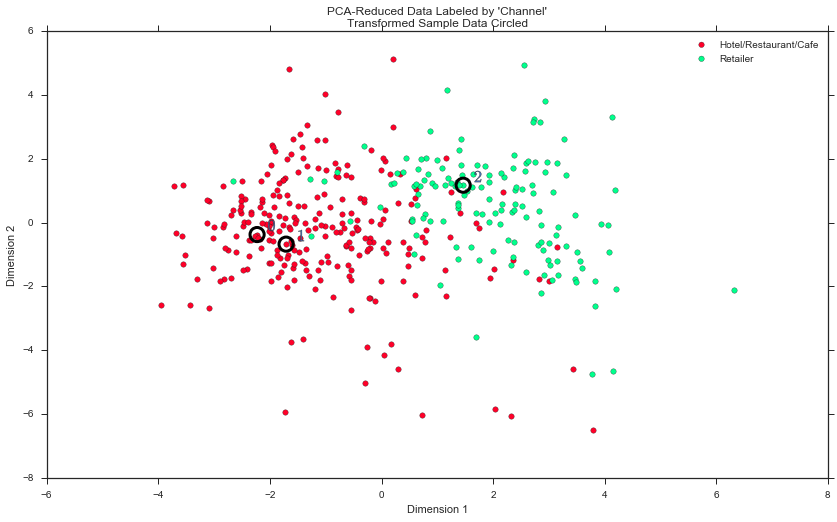

In [183]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.